## Kaggle's Titanic challenge

In [23]:
#importing the libraries
import pandas as  pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
#loading the datasets
titanic_df= pd.read_csv("train_titanic.csv")

In [20]:
#reading a preview of the data
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
# reading the information of the overall datasets. 
# we can learn their data types and also check if there are any null values.
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### One of the key elements in data analysis is to ask the right questions. After examining the datasets, framing multiple questions related to datasets will help us to gain domain knowledge about the data.

###### what is the gender divide among the passengers in the ship

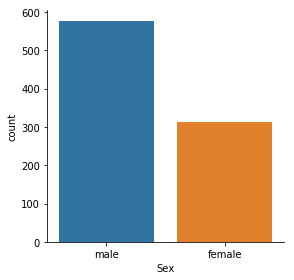

In [29]:
sns.factorplot('Sex',data=titanic_df,kind='count')


###### Now , let us see the classification of classes among men and women. Here we can see that there are more men in third class than women

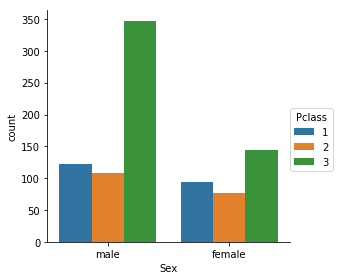

In [31]:
sns.factorplot('Sex',data=titanic_df,kind='count',hue='Pclass')


###### Here,  we only have the information about women or men , but not about children. The data about children is important for this datasets as oftentimes, safety precautions are first served to children and women. 

In [48]:
# creating a function to categorize the status of passenger( male, female, children) based on the age.
# IF age is less than 16, it will be classified as child.
def child_male_female(passengers):
    age,sex=passengers
    if age<16:
        return 'child'
    else:
        return sex
    
    

In [49]:
# We will create a new colummn titled as 'passenger_status' and add to the data frame
titanic_df['passenger_status'] = titanic_df[['Age','Sex']].apply(child_male_female,axis=1)

In [51]:
titanic_df[1:15]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,person_status,passenger_status
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,female,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,female,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,female,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,male,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,male,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,male,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,child,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,female,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,child,child
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,child,child


###### Now let us check the distribution of passenger's status among different classes

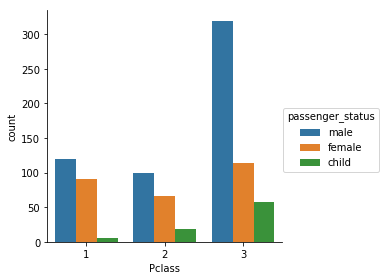

In [52]:
sns.factorplot('Pclass',data=titanic_df,hue='passenger_status',kind='count')

In [53]:
# We can also see the distribution of passengers's status in numeric format.
titanic_df['passenger_status'].value_counts()

male      537
female    271
child      83
Name: passenger_status, dtype: int64

###### we can also create an histogram using pandas library to study the distribution of ages

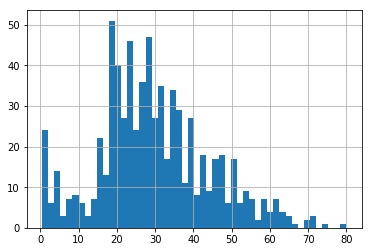

In [54]:
titanic_df['Age'].hist(bins=50)

###### The curve looks symmetrical, we can also check by calculating mean and median. i If mean is approx equal to median, the histogram is symmetrical

In [58]:

# calculating the mean and median
titanic_df['Age'].mean(),titanic_df['Age'].median()

(29.69911764705882, 28.0)

###### We can use Facetgrid to plot multiple kdeplots on one plot.

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<bound method Grid.add_legend of <seaborn.axisgrid.FacetGrid object at 0x7f366aa755f8>>

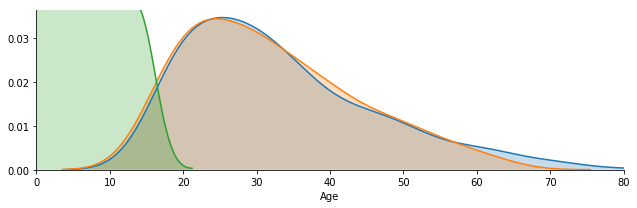

In [73]:
# kedplots for passenger' status
figure=sns.FacetGrid(titanic_df,hue='passenger_status',aspect=3)

#plotting all possible kedplots for the 'age' column by the hue choice.
figure.map(sns.kdeplot,'Age',shade=True)

#seting the limits for the chart
oldest_passenger=titanic_df['Age'].max()

#setting the lower limit as 0
figure.set(xlim=(0,oldest_passenger))

#Adding the legend.
figure.add_legend

In [74]:
#previewing the datasets
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,person_status,passenger_status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,male,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,female,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,female,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,female,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,male,male


In [76]:
    #dropping the null values in the 'cabin' column
    deck_data=titanic_df['Cabin'].dropna()
    deck_data.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

Only the alphateical names of the cabin are required to identify their deck. Hence we are extracting the first charcater of the cabin


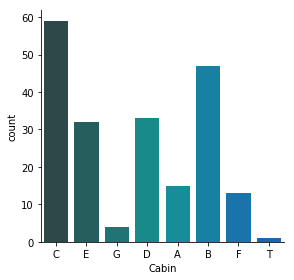

In [78]:
#creating empty list
levels=[]

#for loop to extract first charcter
for level in deck_data:
    levels.append(level[0])
    
#adding the level column
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.factorplot('Cabin',data=cabin_df,palette='winter_d',kind='count')


We have identified a junk vlaue as column T.  we will drop column T.

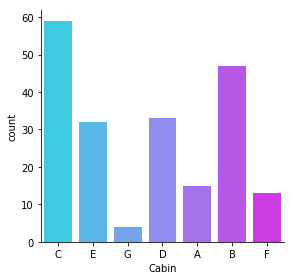

In [83]:
#dropping column T
cabin_df = cabin_df[cabin_df.Cabin != 'T']
#Replot
sns.factorplot('Cabin',data=cabin_df,palette='cool', kind='count')

Embarked column have values as S,Q and C. They denote the cities from which the passengers have come.
Note: C,Q,S stands for Cherbourg, Queenstown, Southhampton respectively.

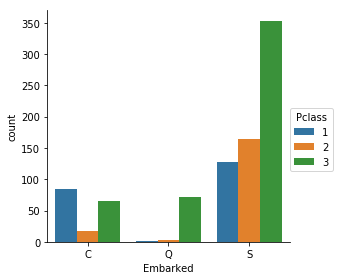

In [91]:
sns.factorplot('Embarked',data=titanic_df,hue='Pclass',order=['C','Q','S'],kind='count')
# we can learn the econominical status of these towns (i,e) people from Queenstown travel mostly in first class.
# majority of passengers from southampton are travelling in third class

In [92]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,person_status,passenger_status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,male,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,female,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,female,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,female,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,male,male


The col "SibSp" refers to the passenger's siblings. It corresponds to 1 if the passenger is travelling with a sibling or 0 if the passenger is not travelling with his sibling. The col "Parch" resfers to parents or children. If parch is 1 , then the passenger is travelling with his parents or children. If the passenger is travelling alone, it will be 0 in both "SibSp" and "Parch" column.

###### we  will create a seperate column called "Travelling alone" and add it to the dataframe

In [93]:
titanic_df['Travelling_Alone'] =  titanic_df.Parch + titanic_df.SibSp
titanic_df['Travelling_Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Travelling_Alone, Length: 891, dtype: int64

In [95]:
titanic_df['Travelling_Alone'].loc[titanic_df['Travelling_Alone']>0] = "With Family"
titanic_df['Travelling_Alone'].loc[titanic_df['Travelling_Alone']==0] = "Alone"

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [96]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,person_status,passenger_status,Travelling_Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,male,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,female,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,female,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,female,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,male,male,Alone


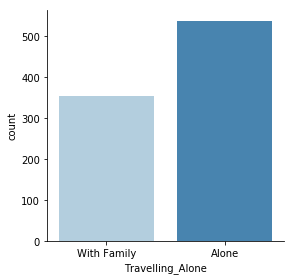

In [101]:
#distribution of passengers who are travelling with family and who are travelling alone
sns.factorplot('Travelling_Alone',data=titanic_df,palette='Blues',kind='count')


##### We will convert the 0 and 1  in "survived" col into  "no" and "yes". And then add  to the dataframe.

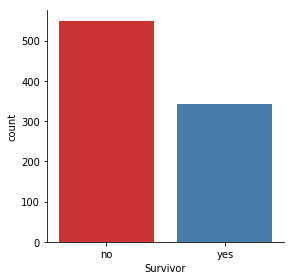

In [103]:
titanic_df["Survivor"] = titanic_df.Survived.map({0: "no", 1: "yes"})

#graph of survival of passengers
sns.factorplot('Survivor',data=titanic_df,palette='Set1',kind='count')

We will see if there is any relationship between the passengers survived and the class they travelled


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


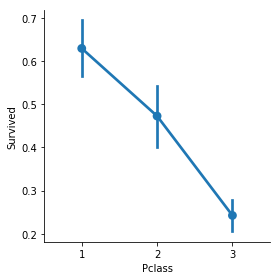

In [105]:
sns.factorplot('Pclass','Survived',data=titanic_df)


From the  above graph, we can assert that there are more survivors in the first class than in the third class.

we will study the distribution of survivors among men,women and children and with their class.

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


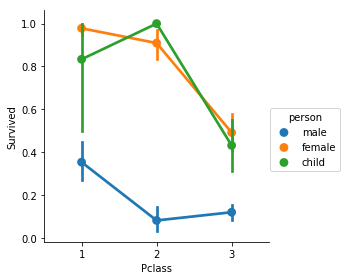

In [106]:
sns.factorplot('Pclass','Survived',hue='person',data=titanic_df)


So from the above graph, it is clear the being a women or child or travelling in first class has higher chance of survival.
whereas being a male or travelling in third class has fewer chances of survival

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


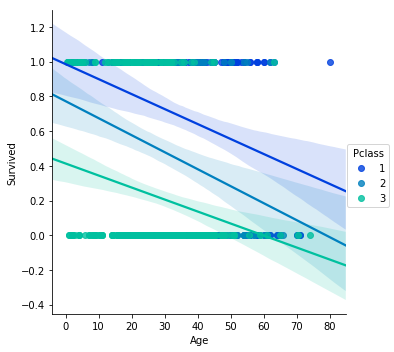

In [108]:
#plotting a linear plot on age  versus survival along with the class.
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter')


so undertand it better, we will create bins.

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


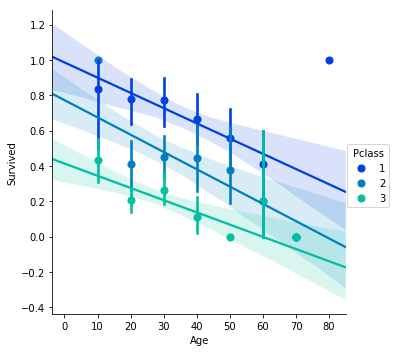

In [109]:
gen_ages=[10,20,30,40,50,60,70,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter',x_bins=gen_ages)


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


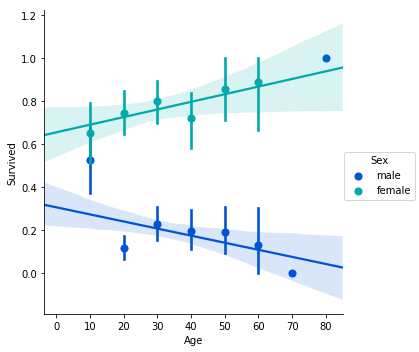

In [110]:
# relating it with sex
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=gen_ages)


We can see that older women have high survival rate than the older men. And it is also reasonable to conclude that women in general have higher survival rate than the men.